In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
raw_data=pd.read_csv("business_case_churn_rate.csv")

In [3]:
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
raw_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Preprocessing

In [5]:
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
raw_data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

### New dataset for the model

In [7]:
raw_data_new=raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [8]:
raw_data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Correlation Checking

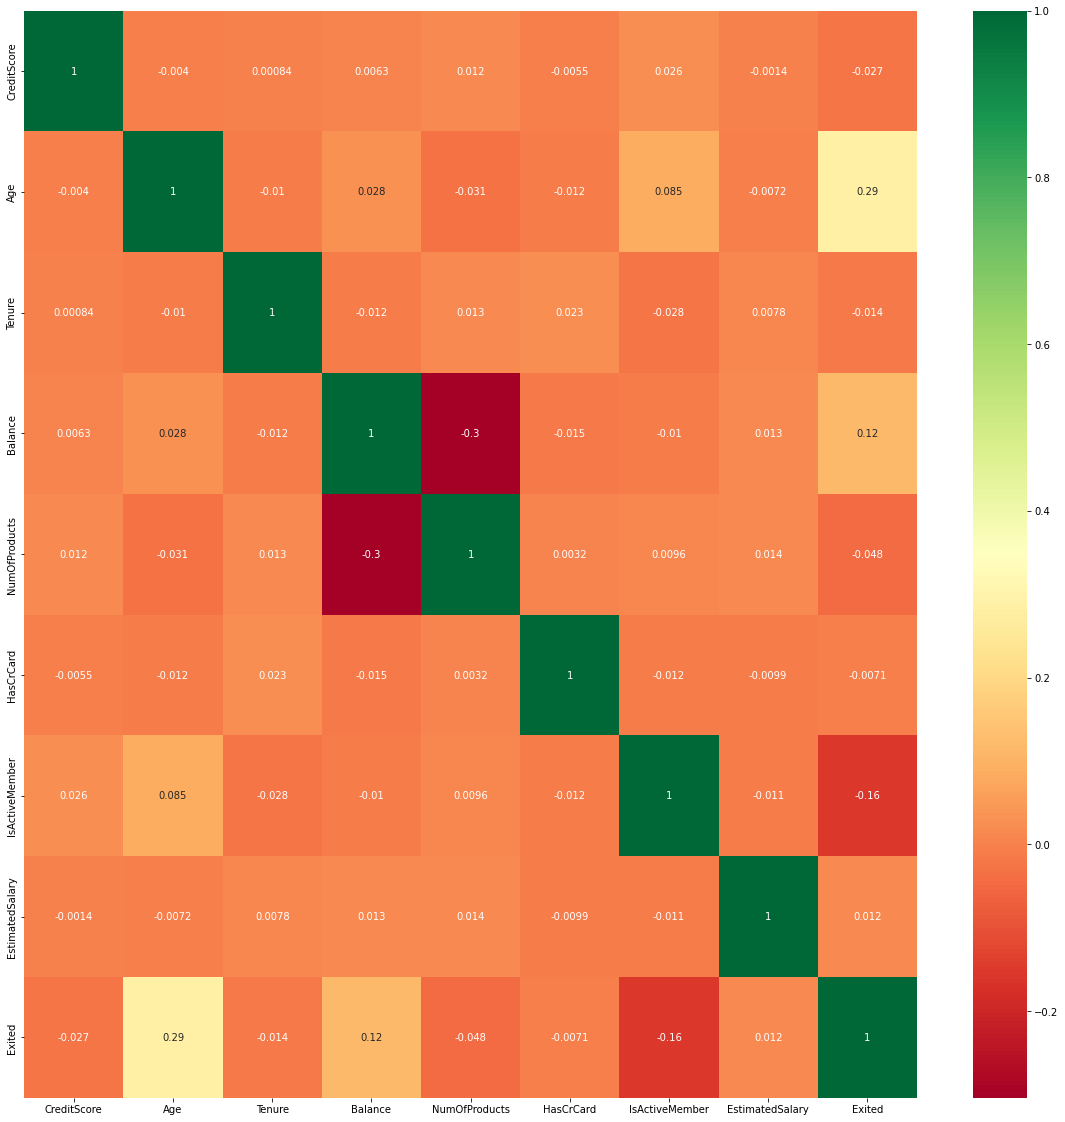

In [9]:
corrmat=raw_data_new.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(raw_data_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
data_with_dummies=pd.get_dummies(raw_data_new, drop_first=True)

In [11]:
data_with_dummies.columns.values

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype=object)

In [12]:
data_with_dummies=data_with_dummies[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                                     'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 
                                     'Gender_Male', 'Exited']]

# Model

In [13]:
data_with_dummies.shape

(10000, 12)

In [14]:
x=data_with_dummies.iloc[:,:11]
y=data_with_dummies.iloc[:,11:]

### Feature Importance

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

In [16]:
model_features=ExtraTreesRegressor()
model_features.fit(x,y.values.ravel())

ExtraTreesRegressor()

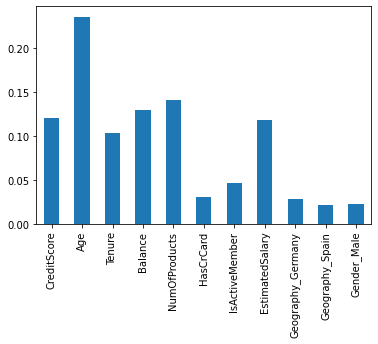

In [17]:
feature_importance=pd.Series(model_features.feature_importances_,index=x.columns)
feature_importance.plot(kind="bar")
plt.show()

### Train and Test dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x.values,y.values, test_size=0.15)

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8500, 11) (1500, 11) (8500, 1) (1500, 1)


### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## RandomForestRegressor

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### hyperparameters

In [25]:
#Randomized Search CV

#Numbers of Trees in random forest
n_estimators=[int(m) for m in np.linspace(start=100,stop=1200, num=12)]

#Number of features to consider at every split
max_features=["auto","sqrt"]

#Maximum number of levels in tree 
max_depth=[int(m) for m in np.linspace(start=5,stop=30, num=6)]
#max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [26]:
#Create the random grid
random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf
            }

In [27]:
rf_regressor=RandomForestRegressor()

In [28]:
rf=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [29]:
rf.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Prediction

In [30]:
predictions=rf.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.20412774814898868
Mean Squared Error: 0.09111426535467759
Root Mean Squared Error: 0.3018513961449865


### Performance

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
prediction_binary=[]
for i in range(len(predictions)):
    item=predictions[i]
    if item >0.5:
        item=1
    else:
        item=0
    prediction_binary.append(item)

In [75]:
data = confusion_matrix(y_test, prediction_binary)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

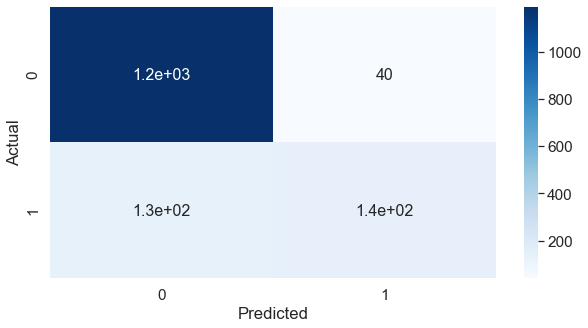

In [81]:
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [77]:
accuracy=(1200+140)/(130+40+1200+140)
print(accuracy)

0.8874172185430463
